## Медіанна фільтрація зображень
### Завдання



In [66]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#### Створимо функцію для переведення кольорового зображення в сіре

In [67]:
def to_greyscale(image):
  return np.dot(image[...,:3], [0.299, 0.587, 0.114])

#### Початкове зображення

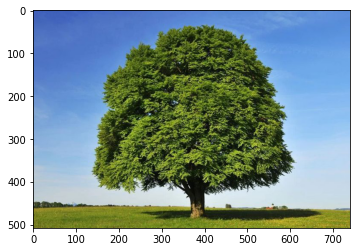

In [68]:
img = plt.imread("img1.jpeg")
plt.imshow(img)

#### Чорно-біле зображення

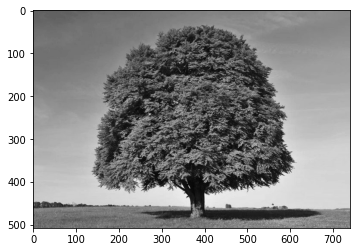

In [69]:
gray_img = to_greyscale(img)
plt.imshow(gray_img, cmap="gray")

#### Додамо шум до зображення


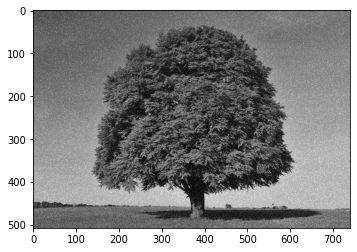

In [70]:
noise = np.random.normal(0,1,gray_img.shape)
noise = noise.reshape(img.shape[0],img.shape[1]).astype('uint8')
noisy_img = gray_img + 0.2*noise
plt.imshow(noisy_img, cmap="gray")

#### Створимо функцію медіанної фільтрації

In [71]:
def medianFilter(img, size):
  temp = []
  indexer = size // 2
  data_final = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for z in range(size):
        if i + z - indexer < 0 or i + z - indexer > len(img) - 1:
          for c in range(size):
            temp.append(0)
        else:
          if j + z - indexer < 0 or j + indexer > len(img[0]) - 1:
            temp.append(0)
          else:
            for k in range(size):
              temp.append(img[i + z - indexer][j + k - indexer])

      temp.sort()
      data_final[i][j] = temp[len(temp) // 2]
      temp = []
  return data_final

Розмір матриці фільтру - **3**

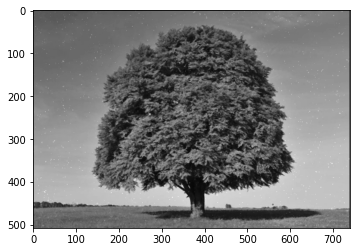

In [72]:
filtered_img_3 = medianFilter(noisy_img, 3)
plt.imshow(filtered_img_3, cmap="gray")

Розмір матриці фільтру - **5**

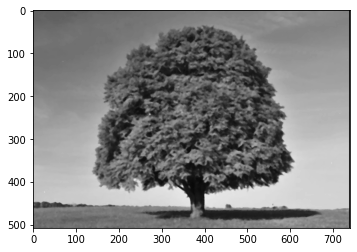

In [73]:
filtered_img_5 = medianFilter(noisy_img, 5)
plt.imshow(filtered_img_5, cmap="gray")

Розмір матриці фільтру - **7**

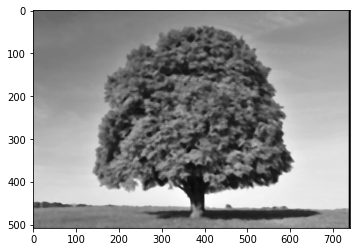

In [74]:
filtered_img_5 = medianFilter(noisy_img, 7)
plt.imshow(filtered_img_5, cmap="gray")

